# Acquisition des données

In [7]:
import datetime as dt
from IPython.utils import io
# Pickle est un module permettant la (dé)sérialisation
import pickle
import numpy as np

In [8]:
# On deserialise les valeurs des hyperparametres du modele.

try: params
except NameError:
    try:
        print("Chargement des hyperparametres...")
        with open("./data/language_perceiver_io_bytes.pickle", "rb") as f:
            params = pickle.loads(f.read())
    except (FileNotFoundError, pickle.UnpicklingError):
        print("Aucun trouves. Telechargement des hyperparametres.")
        !wget -O ./data/language_perceiver_io_bytes.pickle \
                https://storage.googleapis.com/perceiver_io/language_perceiver_io_bytes.pickle

assert type(params).__name__ == 'FlatMapping'
print("Les hyperparametres ont ete charges.")

Les hyperparametres ont ete charges.


In [9]:
start,stop,step = 5,100,5
timers = [ 0.0 for percentage in range(start,stop,step) ]
efficiencies = [ 1.0 for percentage in range(start,stop,step) ]
standard_deviation = [ 0.0 for percentage in range(start,stop,step) ]

for percentage in range(start,stop,step):
    # Pour cacher la 'Progression dans les echantillons' il faut mettre display=True
    with io.capture_output(display=False) as outputCaptured:
        %run analysis.ipynb
    log = "<"+str(startTime_model)+">\n"+outputCaptured.stdout+"\n</"+str(endTime_model)+">\n"
    %store log >>./results/logs.txt

    lists_iterator = int((percentage-start)/step)
    efficiencies[lists_iterator] = model_efficiency
    timers[lists_iterator] = (endTime_model - startTime_model).total_seconds()/dataSize
    standard_deviation[lists_iterator] = np.std(efficiency_samples)
    print(f"L'execution avec un pourcentage de {percentage}% a dure {timers[lists_iterator]}s et a obtenu un score de {model_efficiency}")

    progression = int( (percentage-start+step)/(stop-start) *100 )
    if progression % ((stop-start)/step) <= 5:
        print(f"\nProgression : {progression}%\n")

'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 5% a dure 2.1702175s et a obtenu un score de 0.3888888888888889

Progression : 5%



'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 10% a dure 2.203771833333333s et a obtenu un score de 0.46495535714285713


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 15% a dure 2.1906029444444446s et a obtenu un score de 0.3226890756302522


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 20% a dure 2.1770249444444447s et a obtenu un score de 0.37824397824397826

Progression : 21%



'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 25% a dure 2.1892570555555557s et a obtenu un score de 0.3393518518518519


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 30% a dure 2.190363722222222s et a obtenu un score de 0.22666475681181564


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 35% a dure 2.179107s et a obtenu un score de 0.22166953416953417


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 40% a dure 2.1990067777777775s et a obtenu un score de 0.12044252044252045

Progression : 42%



'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 45% a dure 2.1671526111111112s et a obtenu un score de 0.12455776340580263


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 50% a dure 2.183078777777778s et a obtenu un score de 0.09924270576444488


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 55% a dure 2.189706388888889s et a obtenu un score de 0.09910809778456836

Progression : 57%



'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 60% a dure 2.1708314444444445s et a obtenu un score de 0.0516790425757817


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 65% a dure 2.1776657777777775s et a obtenu un score de 0.05153210381968552


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 70% a dure 2.1653807222222223s et a obtenu un score de 0.03762635999478105


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 75% a dure 2.173252277777778s et a obtenu un score de 0.022922178130511464

Progression : 78%



'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 80% a dure 2.1682507777777777s et a obtenu un score de 0.01641972331627504


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 85% a dure 2.184973888888889s et a obtenu un score de 0.008275862068965516


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 90% a dure 2.1964583333333336s et a obtenu un score de 0.0035842293906810036


'Progression dans les echantillons : 5%'

'Progression dans les echantillons : 11%'

'Progression dans les echantillons : 16%'

'Progression dans les echantillons : 50%'

'Progression dans les echantillons : 55%'

'Progression dans les echantillons : 61%'

'Progression dans les echantillons : 66%'

'Progression dans les echantillons : 100%'

Writing 'log' (str) to file './results/logs.txt'.
L'execution avec un pourcentage de 95% a dure 2.1807414444444446s et a obtenu un score de 0.001851851851851852

Progression : 100%



# Etude des données

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [11]:
#debut : 21:36:43
#50% : 22:01:15 -> temps ecoule : 24:33
#fin : 22:19:30 -> temps ecoule : 42:47
print(timers)
print(min(timers),max(timers))
print(sum(timers)/len(timers))
print(efficiencies)
print(min(efficiencies),max(efficiencies))
print(sum(efficiencies)/len(efficiencies))

[2.1702175, 2.203771833333333, 2.1906029444444446, 2.1770249444444447, 2.1892570555555557, 2.190363722222222, 2.179107, 2.1990067777777775, 2.1671526111111112, 2.183078777777778, 2.189706388888889, 2.1708314444444445, 2.1776657777777775, 2.1653807222222223, 2.173252277777778, 2.1682507777777777, 2.184973888888889, 2.1964583333333336, 2.1807414444444446]
2.1653807222222223 2.203771833333333
2.181939169590643
[0.3888888888888889, 0.46495535714285713, 0.3226890756302522, 0.37824397824397826, 0.3393518518518519, 0.22666475681181564, 0.22166953416953417, 0.12044252044252045, 0.12455776340580263, 0.09924270576444488, 0.09910809778456836, 0.0516790425757817, 0.05153210381968552, 0.03762635999478105, 0.022922178130511464, 0.01641972331627504, 0.008275862068965516, 0.0035842293906810036, 0.001851851851851852]
0.001851851851851852 0.46495535714285713
0.156826625330792


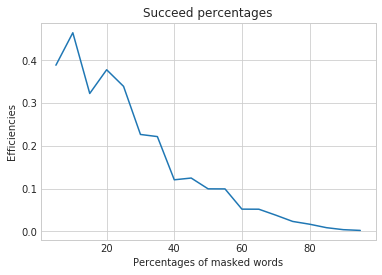

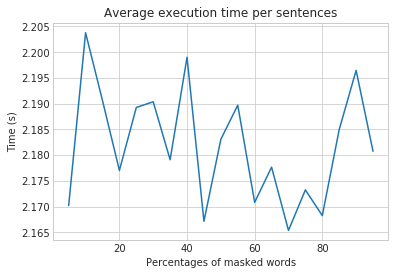

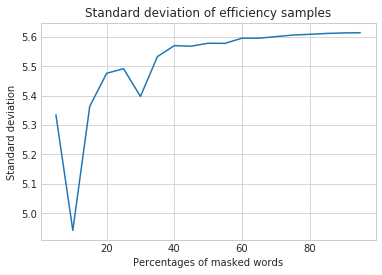

In [12]:
# Pourcentage de réussite
percentages = [i for i in range(start,stop,step)]
plt.title("Succeed percentages")
plt.xlabel("Percentages of masked words")
plt.ylabel("Efficiencies")
plt.plot(percentages, efficiencies)
plt.show()

# Temps d'exécution
plt.title("Average execution time per sentences")
plt.xlabel("Percentages of masked words")
plt.ylabel("Time (s)")
plt.plot(percentages, timers)
plt.show()

# Ecarts types
plt.title("Standard deviation of efficiency samples")
plt.xlabel("Percentages of masked words")
plt.ylabel("Standard deviation")
plt.plot(percentages, standard_deviation)
plt.show()